<a href="https://colab.research.google.com/github/isra-bWk4/upsrj-machine-learning/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Importaciones de procesamiento de datos
import numpy as np
import matplotlib.pyplot as plt

#Improtaciones de Scikit-learn
from sklearn.datasets             import load_breast_cancer
from sklearn.model_selection      import train_test_split
from sklearn.tree                 import DecisionTreeClassifier
from sklearn.metrics              import accuracy_score, classification_report, confusion_matrix
from sklearn.tree                 import plot_tree

In [15]:
# Carga de base de datos
data = load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [24]:
# Variables para nuestro modelo
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [25]:
#División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [26]:
#  Generamos nuestro modelo y lo entrenamos
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [27]:
#Generamos predicción

y_pred = model.predict(X_test)

In [28]:
# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy score: {accuracy}")
print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

accuracy score: 0.9239766081871345
confusion matrix: [[ 57   7]
 [  6 101]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



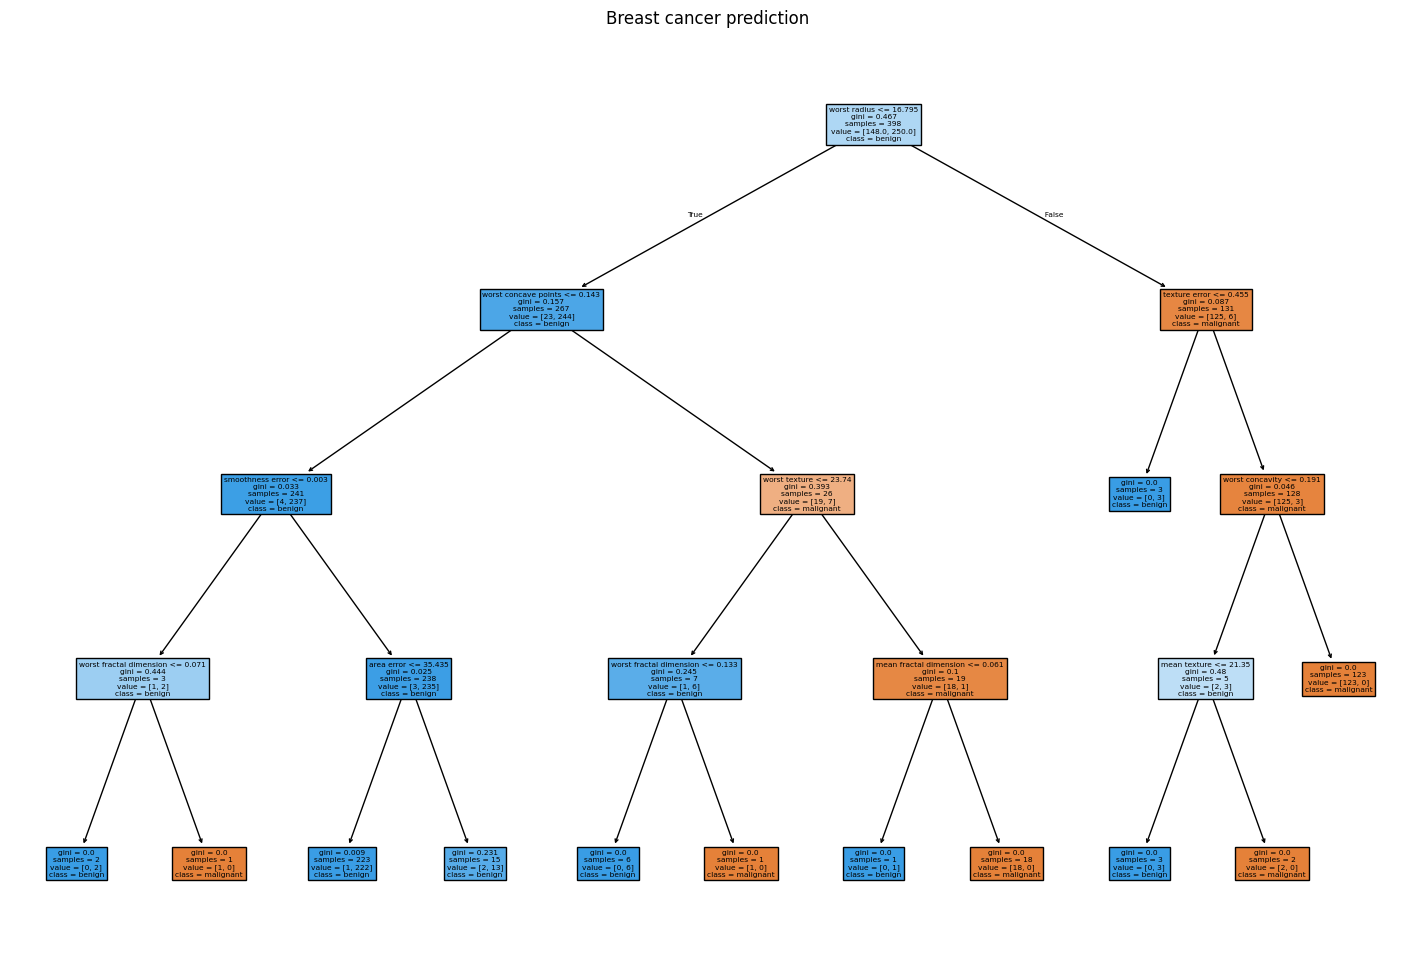

In [32]:
#Graficación de model
plt.figure(figsize=(18, 12))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=target_names,
    filled=True
)
plt.title("Breast cancer prediction")
plt.show()